<a href="https://colab.research.google.com/github/rabin1323/sample--data/blob/main/Machine_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a Email Classification Code work:

In [ ]:
# Import LIbraries:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
#Load the data
df = pd.read_csv("https://raw.githubusercontent.com/rabin1323/Data_Set/main/Emails.csv")
df.info()

print(df.head(10))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB
                                                text  spam
0  Subject: naturally irresistible your corporate...     1
1  Subject: the stock trading gunslinger  fanny i...     1
2  Subject: unbelievable new homes made easy  im ...     1
3  Subject: 4 color printing special  request add...     1
4  Subject: do not have money , get software cds ...     1
5  Subject: great nnews  hello , welcome to medzo...     1
6  Subject: here ' s a hot play in motion  homela...     1
7  Subject: save your money buy getting this thin...     1
8  Subject: undeliverable : home based business f...     1
9  Subject: save your money buy getting this thin...     1


In [ ]:
# Get the column names:
df.columns

Index(['text', 'spam'], dtype='object')

In [ ]:
#Check for dplicates and remove them
df.drop_duplicates(inplace =True)

In [ ]:
#Show the new shape (number of rows and columns)
df.shape

(5695, 2)

In [ ]:
#Show the number of missing (NAN, NaN, na) data for each column
df.isnull().sum()


text    0
spam    0
dtype: int64

In [ ]:
#Download the stopwords package
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/rabin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:

def process_text(text):
    #1 remove the punctuation
    #2 remove stopwords
    #3 return a list of clean text words;
    
    #1
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    #2
    clean_words = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    
    #3
    return clean_words

In [ ]:
#Show the tokenization (a list of tokens also lemmas)
df['text'].head(5).apply(process_text)

0    [Subject, naturally, irresistible, corporate, ...
1    [Subject, stock, trading, gunslinger, fanny, m...
2    [Subject, unbelievable, new, homes, made, easy...
3    [Subject, 4, color, printing, special, request...
4    [Subject, money, get, software, cds, software,...
Name: text, dtype: object

In [ ]:
#Convert a Collection of text to a matrix of tokens:
messages_bow = CountVectorizer (analyzer = process_text).fit_transform(df['text'])

In [ ]:
#Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(messages_bow, df['spam'],test_size= 0.2,shuffle  = True)

In [ ]:
#Get the shape of messages_bow
messages_bow.shape

(5695, 37229)

In [ ]:
#Create and train the Naive Bayes Classifier:
cf = MultinomialNB().fit(X_train,y_train)

In [ ]:
#Print the predictions:
print(cf.predict(X_train))

#print the actual values:
print(y_train.values)

[0 0 1 ... 0 0 0]
[0 0 1 ... 0 0 0]


In [ ]:
#Evaluate the model on the training data set
pred = cf.predict(X_train)
print(classification_report(y_train,pred))
print()
print('Confusion Matrix:  \n', confusion_matrix(y_train,pred))
print()
print('Accuracty :  \n',accuracy_score(y_train,pred) )

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3464
           1       0.99      1.00      0.99      1092

    accuracy                           1.00      4556
   macro avg       1.00      1.00      1.00      4556
weighted avg       1.00      1.00      1.00      4556


Confusion Matrix:  
 [[3454   10]
 [   3 1089]]

Accuracty :  
 0.9971466198419666


In [ ]:
#prediction on test data:
print(cf.predict(X_test))

#print the actual values:
print(y_train.values)

#Evaluate the model on the Test data set
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = cf.predict(X_test)
print(classification_report(y_test,pred))
print()
print('Confusion Matrix:  \n', confusion_matrix(y_test,pred))
print()
print('Accuracty :  \n',accuracy_score(y_test,pred) )


[0 0 0 ... 0 1 1]
[0 0 1 ... 0 0 0]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       863
           1       0.97      1.00      0.98       276

    accuracy                           0.99      1139
   macro avg       0.99      0.99      0.99      1139
weighted avg       0.99      0.99      0.99      1139


Confusion Matrix:  
 [[855   8]
 [  1 275]]

Accuracty :  
 0.9920983318700615


In [ ]:
#Using Decision Tree:
#create and fit tree model
model_tree=DecisionTreeClassifier()

model_tree.fit(X_train,y_train)

#prediction on test data:
print(cf.predict(X_test))

#print the actual values:
print(y_train.values)

#Evaluate the model on the Test data set
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = model_tree.predict(X_test)
print(classification_report(y_test,pred))
print()
print('Confusion Matrix:  \n', confusion_matrix(y_test,pred))
print()
print('Accuracty :  \n',accuracy_score(y_test,pred) )



[0 0 0 ... 0 1 1]
[0 0 1 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       863
           1       0.92      0.94      0.93       276

    accuracy                           0.96      1139
   macro avg       0.95      0.96      0.95      1139
weighted avg       0.97      0.96      0.97      1139


Confusion Matrix:  
 [[839  24]
 [ 16 260]]

Accuracty :  
 0.9648814749780509


In [ ]:
#Using SVM model:
#create and fit SVM model
model_svm=SVC()
model_svm.fit(X_train,y_train)


#prediction on test data:
print(cf.predict(X_test))

#print the actual values:
print(y_train.values)

#Evaluate the model on the Test dataset
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = model_svm.predict(X_test)
print(classification_report(y_test,pred))
print()
print('Confusion Matrix:  \n', confusion_matrix(y_test,pred))
print()
print('Accuracty :  \n',accuracy_score(y_test,pred) )



[0 0 0 ... 0 1 1]
[0 0 1 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       863
           1       0.98      0.89      0.93       276

    accuracy                           0.97      1139
   macro avg       0.97      0.94      0.96      1139
weighted avg       0.97      0.97      0.97      1139


Confusion Matrix:  
 [[859   4]
 [ 31 245]]

Accuracty :  
 0.9692712906057945


In [ ]:
#Using random forest model:
#create and fit model
model_rf=RandomForestClassifier(n_estimators=20,criterion='entropy')

model_rf.fit(X_train,y_train)


#prediction on test data:
print(cf.predict(X_test))

#print the actual values:
print(y_train.values)

#Evaluate the model on the Test datatset
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = model_rf.predict(X_test)
print(classification_report(y_test,pred))
print()
print('Confusion Matrix:  \n', confusion_matrix(y_test,pred))
print()
print('Accuracty :  \n',accuracy_score(y_test,pred) )


[0 0 0 ... 0 1 1]
[0 0 1 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       863
           1       1.00      0.93      0.96       276

    accuracy                           0.98      1139
   macro avg       0.99      0.96      0.98      1139
weighted avg       0.98      0.98      0.98      1139


Confusion Matrix:  
 [[863   0]
 [ 20 256]]

Accuracty :  
 0.9824407374890255


In [ ]:
#Using neural network:
#Creating model
model_mlpc = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)
model_mlpc.fit(X_train,y_train)


#prediction on test data:
print(cf.predict(X_test))

#print the actual values:
print(y_train.values)

#Evaluate the model on the Test dataset
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = model_mlpc.predict(X_test)
print(classification_report(y_test,pred))
print()
print('Confusion Matrix:  \n', confusion_matrix(y_test,pred))
print()
print('Accuracty :  \n',accuracy_score(y_test,pred) )

[0 0 0 ... 0 1 1]
[0 0 1 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       863
           1       0.99      0.95      0.97       276

    accuracy                           0.99      1139
   macro avg       0.99      0.97      0.98      1139
weighted avg       0.99      0.99      0.99      1139


Confusion Matrix:  
 [[860   3]
 [ 13 263]]

Accuracty :  
 0.9859525899912204


In [ ]:
#Using KNeighbor Classifier:
#Creating the model:
model_neigh = KNeighborsClassifier(n_neighbors=3)

model_neigh.fit(X_train,y_train)


#prediction on test data:
print(cf.predict(X_test))

#print the actual values:
print(y_train.values)

#Evaluate the model on the Test dataset
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = model_neigh.predict(X_test)
print(classification_report(y_test,pred))
print()
print('Confusion Matrix:  \n', confusion_matrix(y_test,pred))
print()
print('Accuracty :  \n',accuracy_score(y_test,pred) )

[0 0 0 ... 0 1 1]
[0 0 1 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.91      0.98      0.95       863
           1       0.94      0.71      0.81       276

    accuracy                           0.92      1139
   macro avg       0.93      0.85      0.88      1139
weighted avg       0.92      0.92      0.91      1139


Confusion Matrix:  
 [[850  13]
 [ 81 195]]

Accuracty :  
 0.9174714661984197


In [ ]:
#Using AdaBoostClassifier
#Creating model:
model_Ada = AdaBoostClassifier(n_estimators=100, random_state=0)

model_Ada.fit(X_train,y_train)

#prediction on test data:
print(cf.predict(X_test))

#print the actual values:
print(y_train.values)

#Evaluate the model on the Test dataset
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = model_Ada.predict(X_test)
print(classification_report(y_test,pred))
print()
print('Confusion Matrix:  \n', confusion_matrix(y_test,pred))
print()
print('Accuracty :  \n',accuracy_score(y_test,pred) )

[0 0 0 ... 0 1 1]
[0 0 1 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       863
           1       0.94      0.96      0.95       276

    accuracy                           0.97      1139
   macro avg       0.96      0.97      0.97      1139
weighted avg       0.97      0.97      0.97      1139


Confusion Matrix:  
 [[846  17]
 [ 12 264]]

Accuracty :  
 0.974539069359087


In [ ]:
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.metrics import precision_score, recall_score, auc,roc_curve, f1_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
names = ["Naive Bayes", "Decision Tree", "SVC", 
         "Random Forest", "Neural Network", "KNeighbors","AdaBoos" ]

In [ ]:
#Evaluate the model on the training data set
classifiers = [MultinomialNB(), DecisionTreeClassifier(), SVC(),
              RandomForestClassifier(n_estimators=20,criterion='entropy'),
              MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1),
              KNeighborsClassifier(n_neighbors=3),AdaBoostClassifier(n_estimators=100, random_state=0) ]

In [ ]:
model_cols = []
df=pd.DataFrame(columns=model_cols)
index=0

In [ ]:
for name, clf in zip(names, classifiers):
    clf.fit(X_train,y_train)
    df.loc[index,'Classifiers'] = name
    df.loc[index,'Train Accuracy'] = clf.score(X_train,y_train)
    df.loc[index,'Test Accuracy'] = clf.score(X_test,y_test)
    df.loc[index,'Precision'] = precision_score(y_test,clf.predict(X_test))
    df.loc[index,'Recall'] = recall_score(y_test,clf.predict(X_test))
    df.loc[index,'F1 Score'] = f1_score(y_test,clf.predict(X_test))
    index+=1

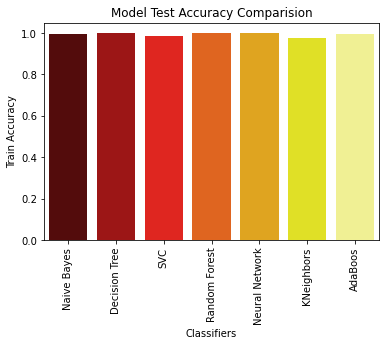

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

sns.barplot(x='Classifiers',y='Train Accuracy', data=df, palette='hot',
            
           color = 'green')
plt.xticks(rotation=90)
plt.title('Model Test Accuracy Comparision')
plt.show()

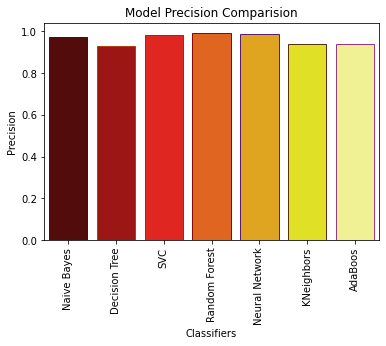

In [ ]:
import seaborn as sns
sns.barplot(x='Classifiers',y='Precision', data=df, palette='hot',
            edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Model Precision Comparision')
plt.show()

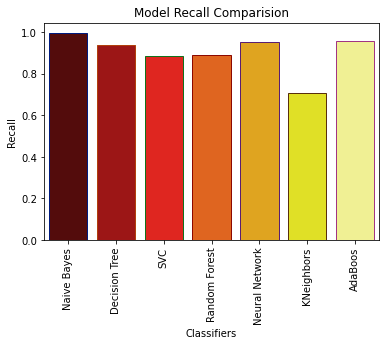

In [ ]:
sns.barplot(x='Classifiers',y='Recall', data=df, palette='hot',
            edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Model Recall Comparision')
plt.show()


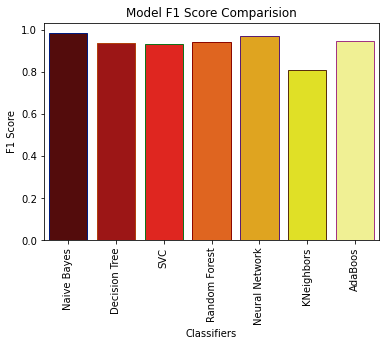

In [ ]:
sns.barplot(x='Classifiers',y='F1 Score', data=df, palette='hot',
            edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Model F1 Score Comparision')
plt.show()